In [2]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [3]:
import numpy as np
import pandas as pd
import itertools

In [4]:
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [5]:
real_data['target'] = "REAL"
fake_data['target'] = "FAKE"

In [6]:
#Merging the 2 datasets
df = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [6]:
df.shape

(44898, 5)

In [9]:
labels = df.target

In [10]:
labels.head()

0    REAL
1    REAL
2    REAL
3    REAL
4    REAL
Name: target, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size=0.2, random_state=20)

In [13]:
x_train.head()

43673    21st Century Wire says Our weekly documentary ...
32959                                                     
13191    DAKAR (Reuters) - Congolese security officials...
25778    Nobody can accuse the GOP of having it all tog...
9796     RALEIGH, N.C. (Reuters) - Thousands of people ...
Name: text, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [15]:
# initilise a Tfidvectorizer
vector = TfidfVectorizer (stop_words='english', max_df=0.7)


In [16]:
#fit and tranform
tf_train =vector. fit_transform(x_train)
tf_test = vector.transform(x_test)

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Assuming you have already defined tf_train and y_train

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [18]:
# predicton the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred= pac.predict(tf_test)


In [19]:
score = accuracy_score(y_test,y_pred)

In [20]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 99.43%


In [21]:
#confusion metrics
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[4668,   28],
       [  23, 4261]], dtype=int64)

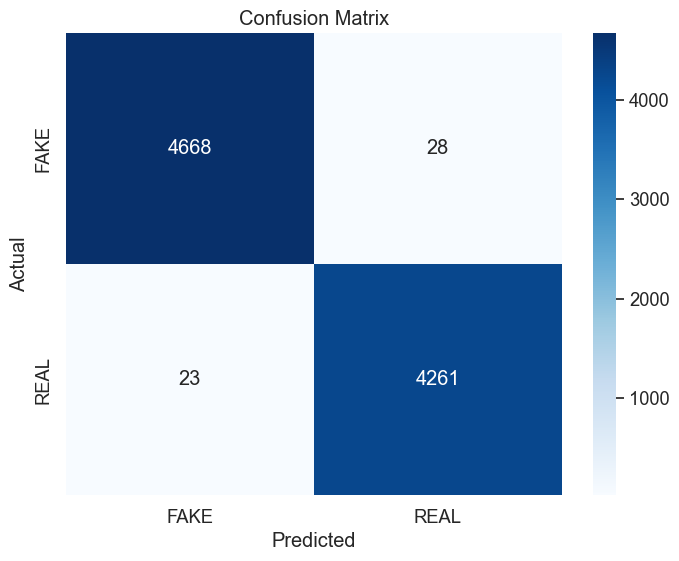

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already defined y_test and y_pred

labels = ['FAKE', 'REAL']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
#save model
import pickle
filename ='finalized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))

In [24]:
filename ='vectorizer_model.pkl'
pickle.dump(vector, open(filename, 'wb'))